# on 750 modified LR

    Actual  Predicted
0     33.6  37.517582
1     47.9  37.518695
2     38.6  38.208080
3     33.6  40.404940
4     38.3  37.475411
5     37.4  39.528374
6     33.3  33.286345
7     27.3  33.255711
8     35.6  35.703001
9     37.2  26.981338
10    31.4  30.318500
11    45.1  42.061782
12    25.0  26.673829
13    29.9  27.772872
14    33.8  39.051339
15    44.0  49.249558
16    27.3  33.255711
17    46.5  44.846363
18    46.1  43.703132
19    36.7  28.070511
The testing accuracy is 73.57343647004429 %
The tarining accuracy is 75.16444735272759 %


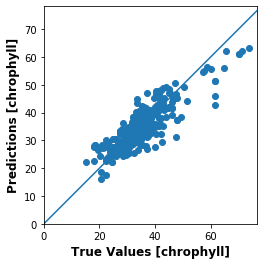

In [106]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
dataset = pd.read_csv('D:/UTPAL PHD/Tea leaf project/chlorophyll value/tea_leaf_750_image_modifiedd.csv')
X = dataset[['mean_r','mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', 'variance', 'stddv_h', 'stddv_s', 'stddv_v', 'kurtosis', 'skewness'
]].values
y = dataset['Chl Value'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, ['mean_r','mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', 'variance', 'stddv_h', 'stddv_s', 'stddv_v', 'kurtosis', 'skewness'
], columns=['Coefficient'])
coeff_df
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
print(df1)
accuracy = regressor.score(X_test,y_test)
print('The testing accuracy is',accuracy*100,'%')
accuracy1 = regressor.score(X_train,y_train)
print('The tarining accuracy is',accuracy1*100,'%')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [chrophyll]')
plt.ylabel('Predictions [chrophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('plot2.png', dpi=350, bbox_inches='tight')

Mean Absolute Error(MAE) 3.700366829352224
Mean Squared Error(MSE) 23.12588959159738
Root Mean Squared Error(RMSE) 4.808938509858218
R Squared 0.7357343647004428


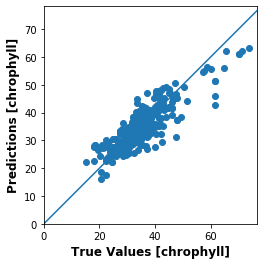

In [107]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [chrophyll]')
plt.ylabel('Predictions [chrophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('plot2.png', dpi=350, bbox_inches='tight')

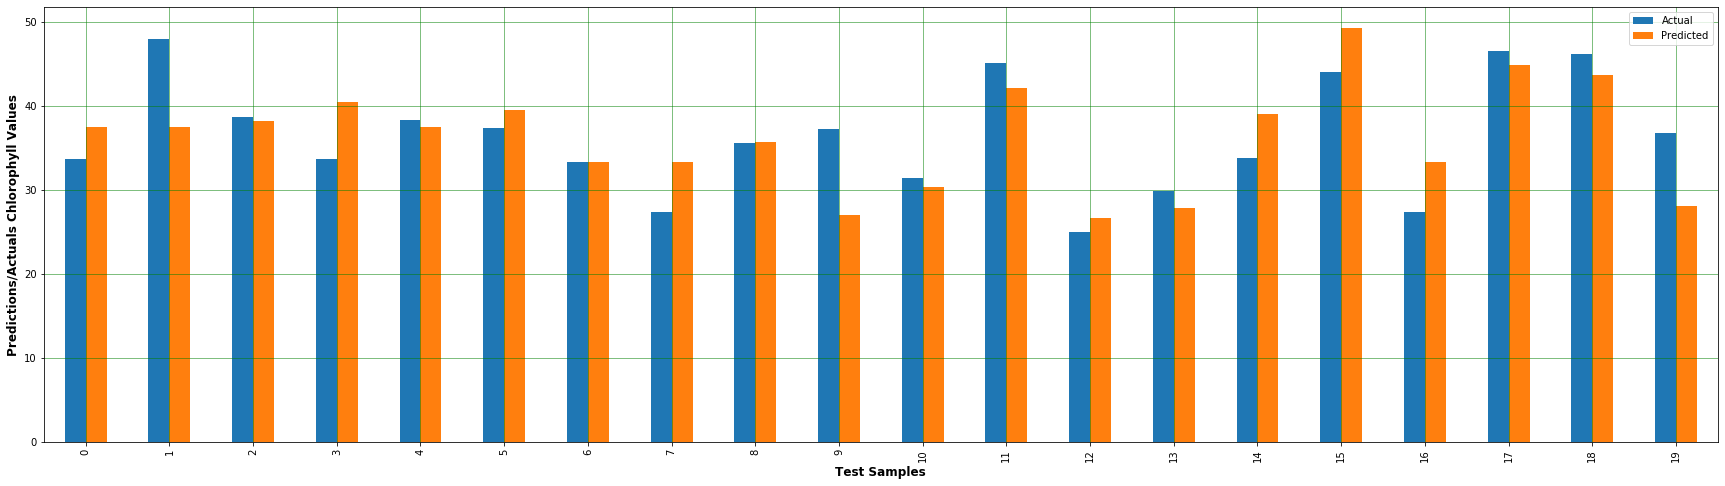

In [108]:
df1.plot(kind='bar',figsize=(30,8))
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test Samples')
plt.ylabel('Predictions/Actuals Chlorophyll Values')
plt.savefig('LR.png', dpi=450, bbox_inches='tight')
plt.show()

# 750 modified using MLP

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D 

In [221]:
Dataset = pd.read_csv('D:/UTPAL PHD/Tea leaf project/chlorophyll value/tea_leaf_750_image_modifiedd.csv')

In [222]:
Dataset.describe()

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness,Chl Value
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,163.173775,167.120321,157.062333,43.778474,35.681186,57.174429,2364.988872,48.118899,69.688218,36.482912,7.118900,-2.180285,35.221067
std,36.154286,36.554225,35.788697,12.851595,10.540126,17.050112,1209.036924,10.794079,14.554460,11.228394,10.241016,1.698986,9.349187
min,2.259592,2.846533,1.241938,16.045376,12.751508,15.706908,251.771557,5.941523,2.954162,13.090083,-0.909649,-5.335713,9.000000
25%,154.771287,157.368650,149.996794,33.494795,27.720100,43.482843,1347.146488,42.623987,58.996057,28.023941,1.798585,-3.009312,29.200000
50%,170.668908,175.287528,164.782762,44.825860,35.475005,60.375722,2359.307752,49.706921,70.587980,36.002233,4.782312,-2.300531,34.250000
75%,181.489201,186.629348,174.744123,53.268765,42.832792,70.457058,3197.230915,54.690861,80.513912,43.716075,9.768074,-1.658798,39.600000
max,208.403165,212.272332,202.984726,75.522077,65.061582,89.811038,5790.713337,83.723033,103.071839,75.383485,156.224934,11.844060,73.700000


In [223]:
Dataset.head(10)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness,Chl Value
0,197.478471,203.192213,191.790658,55.235822,42.422848,68.479752,3201.722811,39.823970,65.016452,42.536723,2.693144,-2.003428,42.9
1,157.704656,161.870731,154.137681,52.779257,44.960307,61.544117,2874.905799,45.798970,72.509849,45.350869,1.417275,-1.547380,44.6
2,168.650369,172.254505,162.291823,55.136258,46.913445,64.705274,3159.514270,50.383784,72.455308,47.207545,1.618314,-1.658600,44.9
3,153.039775,155.967225,148.876568,53.016721,45.475238,61.839672,2909.436115,65.195754,76.502124,46.150734,1.320430,-1.581516,45.3
4,186.557493,190.859075,182.166241,59.816635,50.340256,70.457058,3704.717453,51.364393,70.523119,50.726218,2.146370,-1.901518,45.2
5,172.565066,178.314910,166.201175,69.045265,57.184191,80.395722,4858.062229,58.115633,81.877486,57.790797,0.138586,-1.380028,43.0
6,184.155285,190.669641,176.404890,68.522836,55.055247,81.613041,4829.714656,56.700919,77.134738,55.598282,0.308306,-1.428101,43.5
7,188.522623,198.130165,177.987543,63.491273,45.225953,82.498890,4361.867145,58.671915,82.276330,45.816013,0.721993,-1.485391,41.3
8,186.053256,194.747345,177.139563,64.144374,47.497803,80.697726,4345.896705,58.090442,79.072810,48.052989,0.599916,-1.475026,43.4
9,171.007430,176.438744,165.084787,68.583352,57.021176,79.692518,4790.161508,61.468170,80.032997,57.901486,0.091389,-1.348024,43.0


In [224]:
#Feature matrics and result vector
X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,-1].values

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [227]:
print(X_train.shape)

(1200, 12)


In [228]:
print(X_test.shape)

(300, 12)


In [229]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=512, activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [233]:
model.compile(optimizer='adam',loss='mae',metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               6656      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 257       
Total params: 400,897
Trainable params: 400,897
Non-trainable params: 0
_______________________________________________

In [234]:
#model.fit(X_train,Y_train, epochs=10, batch_size=10, verbose=1)
model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
#y_pred = model.predict(np.expand_dims(X_test, axis=2))

Train on 960 samples, validate on 240 samples
Epoch 1/10
960/960 [==============================] - 0s 325us/sample - loss: 25.1355 - mean_absolute_error: 25.1355 - val_loss: 13.7397 - val_mean_absolute_error: 13.7397
Epoch 2/10
960/960 [==============================] - 0s 120us/sample - loss: 11.5173 - mean_absolute_error: 11.5173 - val_loss: 8.6633 - val_mean_absolute_error: 8.6633
Epoch 3/10
960/960 [==============================] - 0s 97us/sample - loss: 8.3414 - mean_absolute_error: 8.3414 - val_loss: 6.4927 - val_mean_absolute_error: 6.4927
Epoch 4/10
960/960 [==============================] - 0s 96us/sample - loss: 6.5495 - mean_absolute_error: 6.5495 - val_loss: 5.9147 - val_mean_absolute_error: 5.9147
Epoch 5/10
960/960 [==============================] - 0s 96us/sample - loss: 5.6708 - mean_absolute_error: 5.6708 - val_loss: 4.8317 - val_mean_absolute_error: 4.8317
Epoch 6/10
960/960 [==============================] - 0s 113us/sample - loss: 4.8856 - mean_absolute_error: 4.8

Mean Absolute Error(MAE) 3.700366829352224
Mean Squared Error(MSE) 23.12588959159738
Root Mean Squared Error(RMSE) 4.808938509858218
R Squared 0.7357343647004428


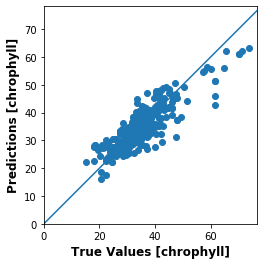

In [235]:
print ('Mean Absolute Error(MAE)',metrics.mean_absolute_error(Y_test, y_pred))
print ('Mean Squared Error(MSE)',metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error(RMSE)',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))     #test_size = 0.40
print('R Squared',metrics.r2_score(Y_test, y_pred))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values [chrophyll]')
plt.ylabel('Predictions [chrophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('plot2.png', dpi=250, bbox_inches='tight')

In [236]:
dff = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = dff.head(20)
print(df1)

    Actual  Predicted
0     33.6  37.517582
1     47.9  37.518695
2     38.6  38.208080
3     33.6  40.404940
4     38.3  37.475411
5     37.4  39.528374
6     33.3  33.286345
7     27.3  33.255711
8     35.6  35.703001
9     37.2  26.981338
10    31.4  30.318500
11    45.1  42.061782
12    25.0  26.673829
13    29.9  27.772872
14    33.8  39.051339
15    44.0  49.249558
16    27.3  33.255711
17    46.5  44.846363
18    46.1  43.703132
19    36.7  28.070511


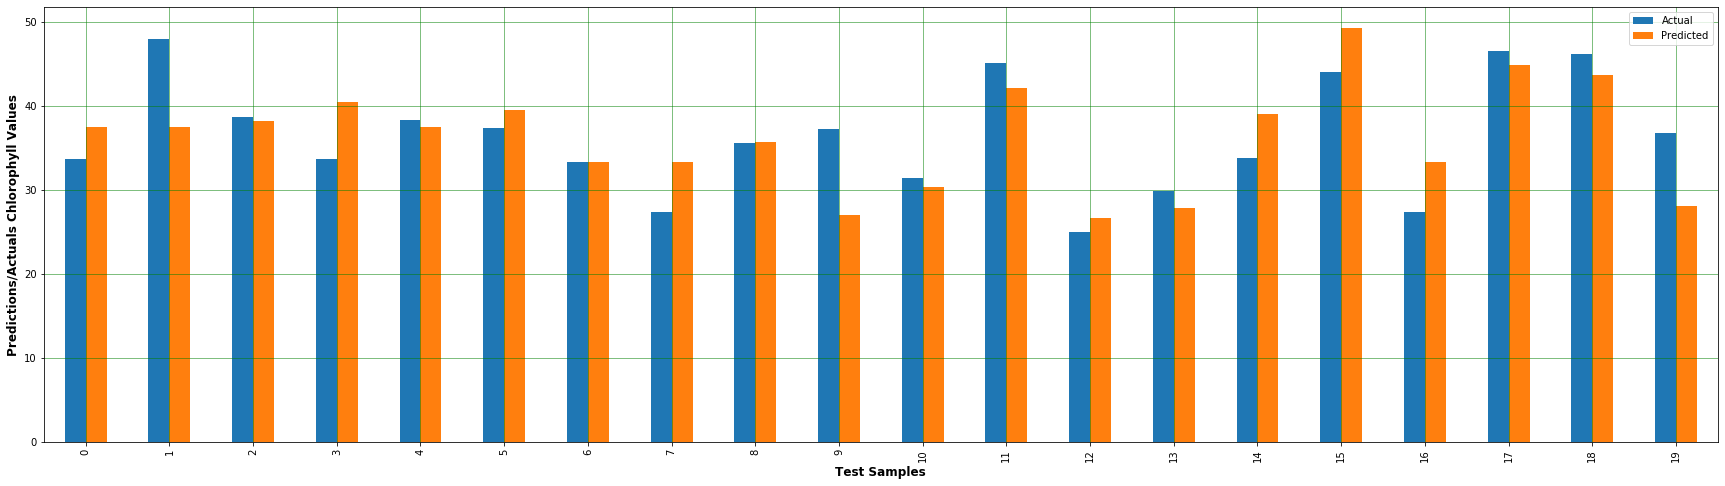

In [237]:
df1.plot(kind='bar',figsize=(30,8))
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test Samples')
plt.ylabel('Predictions/Actuals Chlorophyll Values')
plt.savefig('LR.png', dpi=450, bbox_inches='tight')
plt.show()